### 1.Import Dependencies

In [5]:
!pip install -r requirements.txt

In [1]:
import os
import pandas as pd #alias
import numpy as np  #alias
import seaborn as sns
import matplotlib.pyplot as plt 

# Load the d

### 2.Basic processing

In [2]:
df = pd.read_csv('processed/ChurnModelling_Missing_Value_Handled.csv')
df.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42.00,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41.00,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42.00,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,38.91,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43.00,2,125510.82,1,1,1,79084.10,0


In [3]:
print(f"No of Rows: {len(df)}")

No of Rows: 10000


### 3. outlier detection techniques

#### 3.1 distribution plots

In [4]:
categorical_columns = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember','Exited']
numerical_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary','NumOfProducts']

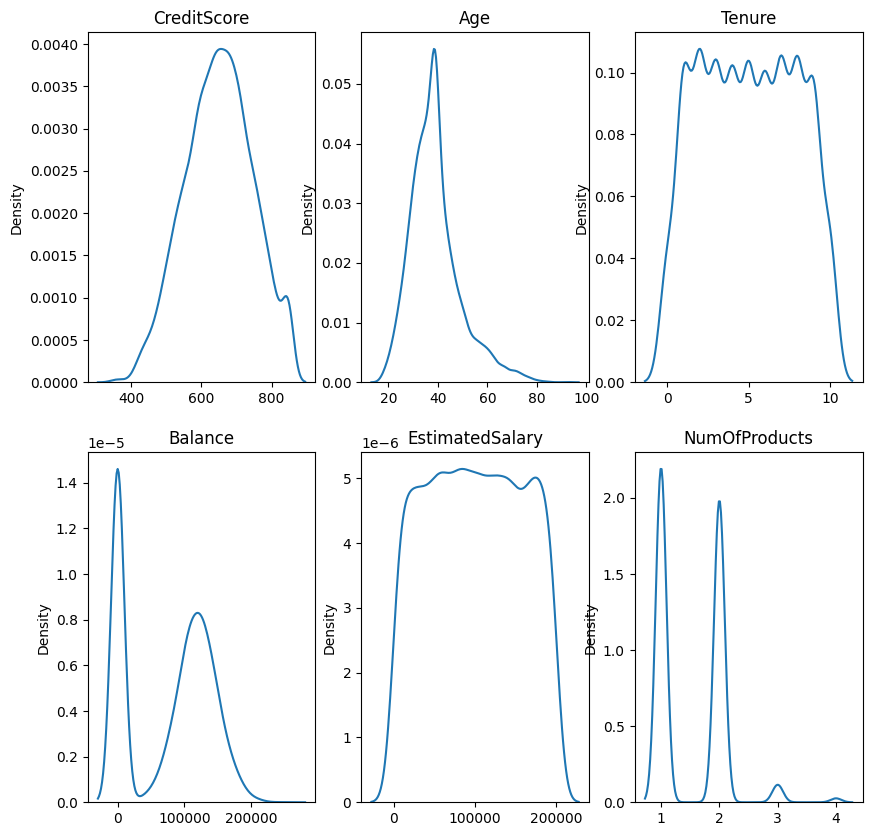

In [5]:
fig, axes = plt.subplots(2,3, figsize = (10,10))
axes = axes.flatten()

for idx, col in enumerate(numerical_columns):
    sns.kdeplot(data = df[col], ax = axes[idx])
    axes[idx].set_title(col)
    axes[idx].set_xlabel('')


plt.show()

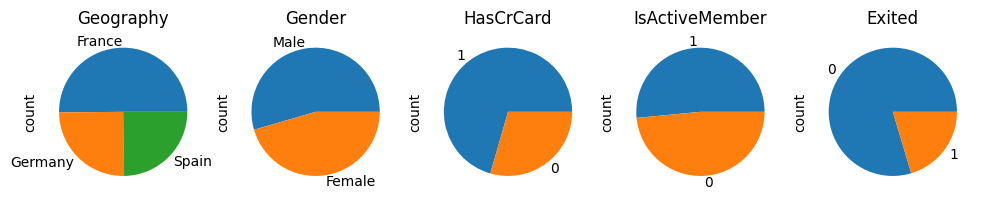

In [6]:
fig, axes = plt.subplots(1,5, figsize = (12,8))

for idx, col in enumerate(categorical_columns):
    df[col].value_counts().plot(kind = 'pie', ax = axes[idx])
    axes[idx].set_title(col)

plt.show()

#### 3.2 box plots

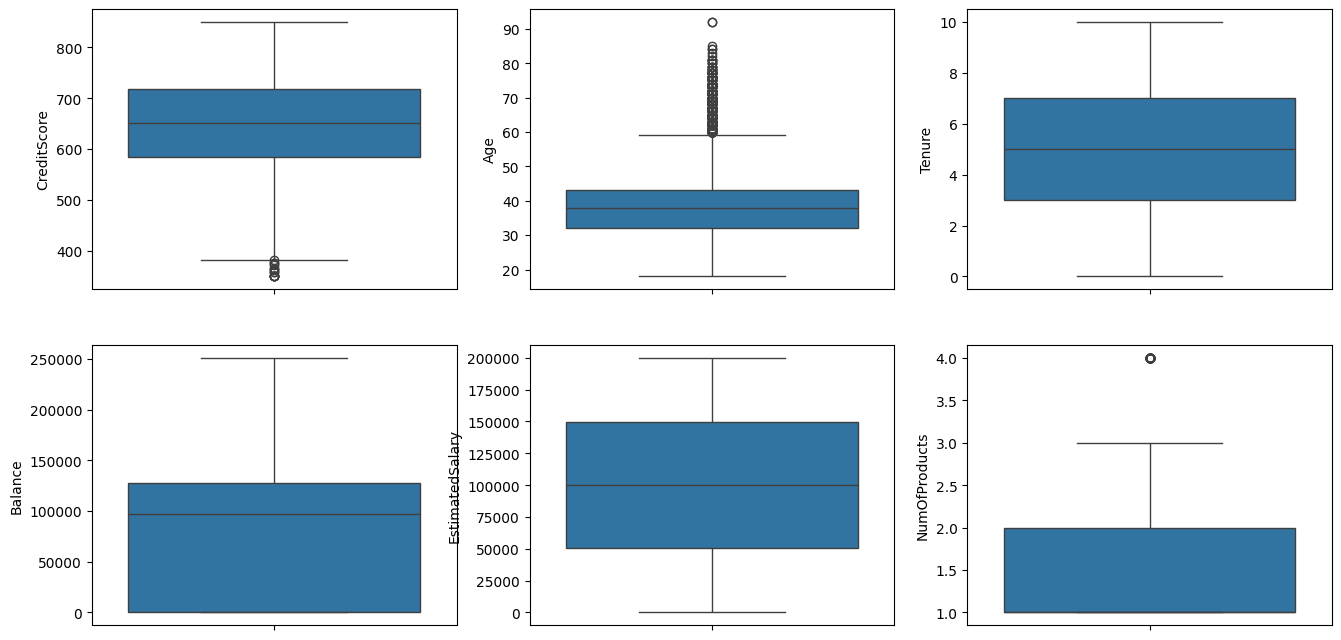

In [7]:
fig, axes = plt.subplots(2,3, figsize = (16,8))

sns.boxplot(data = df['CreditScore'], ax = axes[0,0])
sns.boxplot(data = df['Age'], ax = axes[0,1])
sns.boxplot(data = df['Tenure'], ax = axes[0,2])
sns.boxplot(data = df['Balance'], ax = axes[1,0])
sns.boxplot(data = df['EstimatedSalary'], ax = axes[1,1])
sns.boxplot(data = df['NumOfProducts'], ax = axes[1,2])

plt.show()

#### 3.3 empirical rule / 3-sigma rule

In [8]:
def find_anomalies(data):
    mean = data.mean()
    std = data.std()

    upper_bound = mean + (3*std)
    lower_bound = mean - (3*std)

    return (data > upper_bound) | (data < lower_bound)


In [9]:
numerical_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']

for col in numerical_columns:
    n_outliers = find_anomalies(df[col]).sum()
    n_outliers_percentage = (n_outliers / len(df)) * 100
    print(f"{col}: {n_outliers} outliers ({n_outliers_percentage:.3f}%)")

CreditScore: 8 outliers (0.080%)
Age: 144 outliers (1.440%)
Tenure: 0 outliers (0.000%)
Balance: 0 outliers (0.000%)
EstimatedSalary: 0 outliers (0.000%)


#### 3.4 IQR Method

In [10]:
def find_anomalies(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)

    IQR = Q3 - Q1

    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)

    return (data > upper_bound) | (data < lower_bound)



In [11]:
numerical_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']

for col in numerical_columns:
    n_outliers = find_anomalies(df[col]).sum()
    n_outliers_percentage = (n_outliers / len(df)) * 100
    print(f"{col}: {n_outliers} outliers ({n_outliers_percentage:.3f}%)")

CreditScore: 15 outliers (0.150%)
Age: 501 outliers (5.010%)
Tenure: 0 outliers (0.000%)
Balance: 0 outliers (0.000%)
EstimatedSalary: 0 outliers (0.000%)


In [18]:
outlier_mask_log = pd.DataFrame()
for col in numerical_columns:
    outlier_mask_log[col] = find_anomalies(df[col])

outlier_count = outlier_mask_log.sum(axis = 1)
outlier_mask_log['Outlier Count'] = outlier_count
outlier_mask_log = outlier_mask_log[outlier_mask_log['Outlier Count'] == 2]
outlier_mask_log.head()

,CreditScore,Age,Tenure,Balance,EstimatedSalary,Outlier Count
8762,True,True,False,False,False,2


In [28]:
df.to_csv('processed/ChurnModelling_Outliers_Handled.csv',index = False)